# Projeto 4: Teste AB


### Pedro de la Peña

## Introdução:

League of Legends é, atualmente, o jogo para computadores mais jogado no mundo. Ele é um jogo de estratégia em tempo real e é voltado para a batalha de jogadores contra jogadores (players contra players ou PvP). As principais disputas ocorrem no mapa Summoners Rift, um campo de batalha em que 10 jogadores se dividem igualmente em duas equipes, azul e vermelha. Cada lado do mapa tem suas vantagens e desvantagens e alguns jogadores podem se sentir mais à vontade jogando em um lado lado que no outro.

As partidas tem sua duração variada, com média aproximada de 35~40 minutos. Nela, os jogadores precisam conquistar a porção do mapa do time dos oponentes e a partida tem fim quando um dos times destroi a unidade central (Nexus) dos oponentes. Deste modo, é importante notar que não é possivel ocorrer um empate.

No decorrer dos minutos da partida, os jogadores, além de se confrontarem, precisam fazer objetivos para ganhar espaço no mapa e aumentar suas condições de vitória. A maioria dos objetivos do jogo garante ouro para o jogador e/ou sua equipe e isso possibilita a aquisição de itens que fortificam os personagens dos jogadores. Na maioria das vezes, a equipe vencedora possui, por consequência, mais ouro e mais itens.

Os valores de ouro das duas equipes foram coletados a partir de 100 partidas aleatórias do meu (Pedro de la Peña) histórico de partidas. Vale lembrar que os jogadores não conseguem escolher em que lado do mapa irão jogar quando entram em uma partida.
Os jogos foram coletados a partir do site: http://matchhistory.br.leagueoflegends.com/pt/#match-history/BR1/205641583

In [1]:
import pandas as pd
import json
import itertools
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

#### Leitura do arquivo

In [2]:
gold = pd.read_excel('gold_team.xlsx')

In [3]:
gold.describe()

,Azul,Vermelho
count,100.000000,100.000000
mean,59.434000,61.821000
std,17.671739,16.768099
min,23.000000,26.400000
25%,46.875000,50.550000
50%,59.950000,60.800000
75%,67.750000,73.900000
max,119.900000,105.000000


In [4]:
df = pd.DataFrame()
df["Azul"] = gold.Azul
df["Vermelho"] = gold.Vermelho

#### Histograma de ouro por equipe

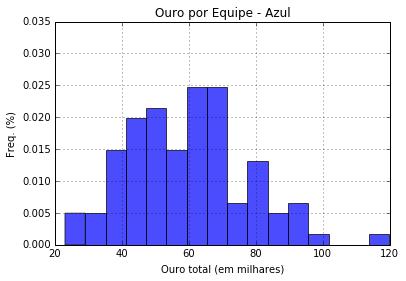

In [5]:
gold.Azul.plot(kind='hist',bins=16,xlim=[20,120],ylim=[0,0.035], title= "Ouro por Equipe - Azul", alpha =0.7, normed=1)
plt.ylabel("Freq. (%)")
plt.xlabel("Ouro total (em milhares)")
plt.grid()

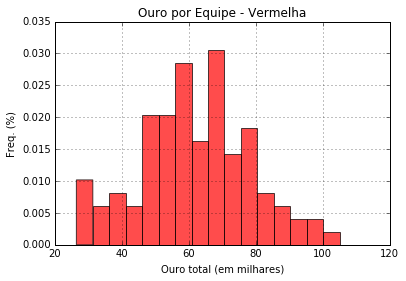

In [6]:
gold.Vermelho.plot(kind='hist',bins=16,xlim=[20,120], ylim=[0,0.035], title= "Ouro por Equipe - Vermelha", alpha =0.7, color='red',normed=1)
plt.ylabel("Freq. (%)")
plt.xlabel("Ouro total (em milhares)")
plt.grid()

## Teste de hipótese

A empresa responsável pelo jogo, RIOT Games, preza pelo balanceamento nas partidas e, portanto, o unico critério que deveria afetar o resultado de uma partida são as habilidades dos próprios jogadores. Logo, a hipótese nula foi definida como o ouro médio ganho por partida sendo igual tanto para a equipe azul quanto para a equipe vermelha (H0:μa=μv) e a hipótese alternativa como o valor médio do ouro ganho sendo diferente entre as equipes (H1:μa ≠ μv). 

Pelo fato de não possuir muitas amostras e a partir delas não haver forte evidência de ser uma distribuição normal, foi necessário realizar a padronização por meio de um bootstrap. Para isso, 10000 valores aleatórios das amostras de cada uma das equipes foram selecionados e então a diferença entre esses valores foram adicionados à uma lista. Após obter esses valores, foi realizado o teste z.

In [42]:
difgold = []

n = 10000
for i in range(n):
    ga = np.random.choice(gold.Azul) #Seleciona valor aleatório da equipe azul
    gv = np.random.choice(gold.Vermelho) #Seleciona valor aleatório da equipe vermelha
    gd = ga - gv
    difgold.append(gd)

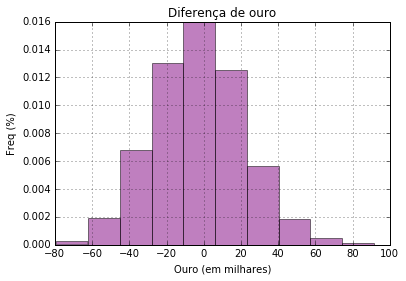

In [50]:
plt.hist(difgold, alpha=0.5, color='purple', normed=1)
plt.title("Diferença de ouro")
plt.xlabel("Ouro (em milhares)")
plt.ylabel("Freq (%)")
plt.grid()

In [69]:
#Diferença das médias de ouro observadas
dmgObs = gold.Azul.mean() - gold.Vermelho.mean()

#Média Amostral
mdg= np.mean(difgold)
    
#Desvio Padrão Amostral
dpg = np.std(difgold)

#distribuição z
z=(dmgObs - mdg)/(dpg)

#Print de valores
print("Diferença das médias observadas:", dmgObs)
print("Média das Amostras:", mdg)
print("Desvio padrão amostral:",dpg)
print("Valor de z:", z)

Diferença das médias observadas: -2.3870000000000076
Média das Amostras: -2.82252
Desvio padrão amostral: 24.407883375
Valor de z: 0.0178434153141


### Análise da posição do valor-p em relação ao alpha

In [70]:
pvalue = stats.norm.sf(z)
print(pvalue)
print()

alpha=0.1
if(pvalue> 1-alpha):
    print("Com o nível de significância alpha= 10%, o teste T REJEITA a hipótese nula")
else:
    print("Com o nível de significância alpha= 10%, o teste T NÃO REJEITA a hipótese nula")
    
alpha2=0.05
if(pvalue> 1-alpha2):
    print("Com o nível de significância alpha= 5%, o teste T REJEITA a hipótese nula")
else:
    print("Com o nível de significância alpha= 5%, o teste T NÃO REJEITA a hipótese nula")
    
alpha3=0.01
if(pvalue> 1-alpha3):
    print("Com o nível de significância alpha= 1%, o teste T REJEITA a hipótese nula")
else:
    print("Com o nível de significância alpha= 1%, o teste T NÃO REJEITA a hipótese nula")    

0.492881884926

Com o nível de significância alpha= 10%, o teste T NÃO REJEITA a hipótese nula
Com o nível de significância alpha= 5%, o teste T NÃO REJEITA a hipótese nula
Com o nível de significância alpha= 1%, o teste T NÃO REJEITA a hipótese nula


## Conclusão: ###

Após os teste, foi percebido que a hipotese nula é não rejeitada com um nivel de significancia de 10%, 5% e 1% indicando que o a equipe que o jogador fará parte não tem influência na quantidade de ouro que será recebida até o final da partida pelas equipes. 

Conclui-se que, ao analisar os dados coletados, com nível de confiança de 99%, a alteração da equipe não influencia o ganho de ouro final e que o balanceamento das equipes para esse quesito está boa e consequentemente, o balanceamento geral das partidas também.